#**FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS**

**Objective:**
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset.

**Dataset:**
The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.

**Part 1: Data Preparation and Exploration**

1.	**Data Loading:** Load the exchange_rate.csv dataset and parse the date column appropriately.
2.	**Initial Exploration:** Plot the time series for currency to understand their trends, seasonality, and any anomalies.
3.	**Data Preprocessing:** Handle any missing values or anomalies identified during the exploration phase.

**Part 2: Model Building - ARIMA**
1.	**Parameter Selection for ARIMA:** Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
2.	**Model Fitting:** Fit the ARIMA model with the selected parameters to the preprocessed time series.
3.	**Diagnostics:** Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4.	**Forecasting:** Perform out-of-sample forecasting and visualize the predicted values against the actual values.

**Part 3: Model Building - Exponential Smoothing**
1.	**Model Selection:** Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
2.	**Parameter Optimization:** Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
3.	**Model Fitting and Forecasting:** Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

**Part 4: Evaluation and Comparison**
1.	**Compute Error Metrics:** Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
2.	**Model Comparison:** Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
3.	**Conclusion:** Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

**Deliverables:**
- Include visualizations and explanations for the choices and findings at each step.
-	Well-commented Python code that used to conduct the analysis and build the models.

**Assessment Criteria:**
- Accuracy and completeness of the data preparation and exploration steps.
- Justification for model selection and parameter tuning decisions.
- Clarity and depth of the analysis in the diagnostics and model evaluation stages.

This assignment offers a hands-on experience with real-world data, applying sophisticated time series forecasting methods to predict future currency exchange rates.


**Data Loading:**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset and parse the 'date' column
file_path = '/content/exchange_rate.csv'  # Update this with the correct path to your file
exchange_rate_df = pd.read_csv(file_path, parse_dates=['date'])

In [ ]:
#first few rows
print(exchange_rate_df.head())

               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849


In [ ]:
#last few rows
print(exchange_rate_df.tail())

                  date   Ex_rate
7583  06-10-2010 00:00  0.718494
7584  07-10-2010 00:00  0.721839
7585  08-10-2010 00:00  0.723197
7586  09-10-2010 00:00  0.720825
7587  10-10-2010 00:00  0.720825


In [ ]:
# Display basic information
print(exchange_rate_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB
None


In [ ]:
#Number of columns and rows
exchange_rate_df.shape

(7588, 2)

In [ ]:
#Typcasting
exchange_rate_df['date'] = pd.to_datetime(exchange_rate_df['date'], format='%d-%m-%Y %H:%M')

In [ ]:
#Datatypes
exchange_rate_df.dtypes

date       datetime64[ns]
Ex_rate           float64
dtype: object

**Initial Exploration:**

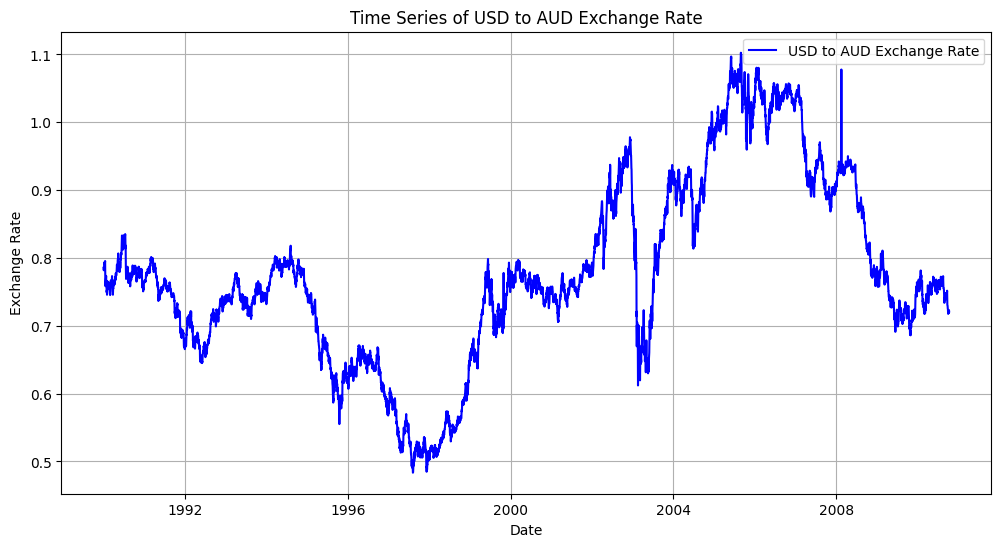

In [ ]:
# Plot the time series for the exchange rate
plt.figure(figsize=(12, 6))
plt.plot(exchange_rate_df['date'], exchange_rate_df['Ex_rate'], color='blue', label='USD to AUD Exchange Rate')
plt.title('Time Series of USD to AUD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

###**Interpretation of the Time Series Plot for USD to AUD Exchange Rate**

1. **Trend Analysis:**
The exchange rate between USD and AUD exhibits multiple trends over the time period.
- **Early 1990s:** There is a downward trend until around 1993, where the exchange rate decreases.
- **Mid to Late 1990s:** The trend becomes upward again from around 1995 until about 1998, after which a sharp decline is observed.
- **2000 to Mid-2000s:** The early 2000s show a significant increase in the exchange rate, peaking around 2001, followed by a steep decline and then another rise up until around 2004.
- **2004 to 2008:** After reaching a peak around 2008, the exchange rate experiences another downward trend.

2. **Seasonality:**
The time series does not exhibit clear seasonality, but there are periods where fluctuations seem more pronounced, especially around the peaks and troughs.

3. **Volatility:**
The exchange rate appears to be quite volatile, with several sharp increases and decreases over the period observed. This suggests that external factors (such as economic policies, market conditions, and geopolitical events) might have influenced the exchange rate significantly.

4. **Anomalies:**
There are a few sharp spikes and drops, particularly around the years 2001 and 2008. These could be linked to significant economic events such as the dot-com bubble burst or the global financial crisis of 2008.

5. **Conclusion:**
The exchange rate time series appears to be non-stationary with evident trends and volatility. These characteristics suggest that when modeling this time series, approaches like ARIMA with differencing or exponential smoothing with a trend component would be suitable to capture these patterns.
Further steps, such as applying transformations or differencing, might be necessary to make the time series stationary, which is essential for most time series forecasting models like ARIMA.

**Data Preprocessing**

In [ ]:
# Check for missing values
missing_values = exchange_rate_df.isnull().sum()
print("Missing values in the dataset:\n", missing_values)

Missing values in the dataset:
 date       0
Ex_rate    0
dtype: int64


**No missing values**

In [ ]:
# Check for anomalies (e.g., outliers) using descriptive statistics
print(exchange_rate_df.describe())

                      date      Ex_rate
count                 7588  7588.000000
mean   2000-05-21 12:00:00     0.776974
min    1990-01-01 00:00:00     0.483297
25%    1995-03-12 18:00:00     0.701422
50%    2000-05-21 12:00:00     0.761377
75%    2005-07-31 06:00:00     0.873477
max    2010-10-10 00:00:00     1.102536
std                    NaN     0.136620


- The exchange rate has fluctuated considerably over the period, with a minimum value of around 0.4833 and a maximum of about 1.1025.
- The mean exchange rate of around 0.777 indicates that, on average, 1 USD was worth approximately 0.777 AUD during this period.
- The data shows a significant range between the minimum and maximum values, reflecting various economic conditions over the two decades.
- The dates provided confirm that the dataset spans over 20 years, with consistent daily observations.


##**Part 2: Model Building - ARIMA**

**1. Parameter Selection for ARIMA**

<Figure size 1200x600 with 0 Axes>

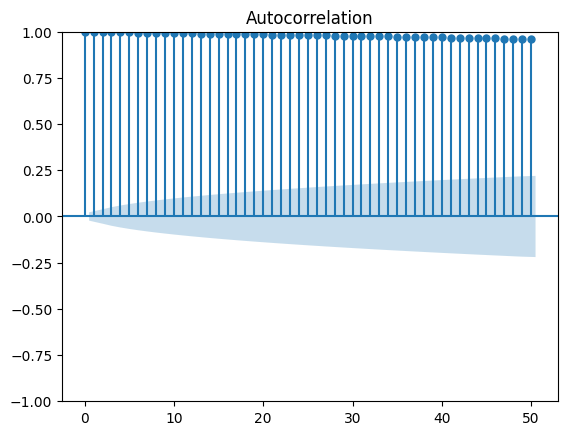

In [ ]:
# ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots to estimate initial parameters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots to identify p and q
plt.figure(figsize=(12, 6))
plot_acf(exchange_rate_df['Ex_rate'], lags=50)
plt.show()

####**Insights from the ACF Plot:**
- **Strong Persistence:** The autocorrelation remains close to 1 across many lags, indicating strong persistence in the time series.
- **Non-Stationarity:** The lack of decay in the autocorrelation suggests the time series is non-stationary.
- **Need for Differencing:** The time series likely requires differencing to remove the trend and achieve stationarity.
- **Model Implication:** ARIMA model will likely need a non-zero differencing (d) parameter. Further analysis with the PACF plot is needed to determine AR (p) and MA (q) orders.

<Figure size 1200x600 with 0 Axes>

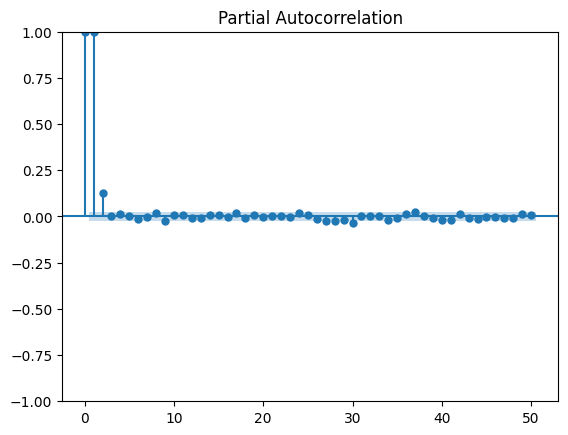

In [ ]:
plt.figure(figsize=(12, 6))
plot_pacf(exchange_rate_df['Ex_rate'], lags=50)
plt.show()


####**Insights from the PACF Plot:**
- **Significant Spike at Lag 1:** The partial autocorrelation is very strong at lag 1 and drops sharply after that, indicating that the time series has a strong first-order autoregressive (AR) component.
- **Near Zero Beyond Lag 1:** After lag 1, the PACF values are close to zero and within the confidence interval, suggesting that additional AR terms may not be necessary.
- **Model Implication:**
- **AR Term (p):** A model with an AR(1) term may be sufficient, as higher-order terms do not contribute significantly.
- **Differencing:** Combined with the ACF plot, the need for differencing (d) is confirmed to remove non-stationarity before applying an AR(1) model.
- **Overall Interpretation:** The PACF plot supports a simple AR(1) model after differencing the series to address non-stationarity. Further model diagnostics will be required to confirm this.

**Model Fitting**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Example ARIMA model (replace p, d, q with the values derived from ACF/PACF)
p, d, q = 1, 1, 1  # Replace these with actual values based on the ACF and PACF analysis
arima_model = ARIMA(exchange_rate_df['Ex_rate'], order=(p, d, q))
arima_result = arima_model.fit()

In [ ]:
# Summary of the ARIMA model
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Wed, 21 Aug 2024   AIC                         -56102.322
Time:                        05:03:59   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

###**Interpretation of the SARIMAX Model Results:**

**Model Summary:**
- **Model Type:** ARIMA(1,1,1), which means the model has 1 autoregressive term (AR), 1 differencing term (I), and 1 moving average term (MA).
- **Number of Observations:** 7,588 observations were used in the analysis.

**Coefficients:**
- **AR(1) Coefficient (ar.L1):** -0.1268, which is statistically significant (p-value = 0.005). This negative value suggests a weak negative relationship between the current value and its previous lag.
- **MA(1) Coefficient (ma.L1):** -0.0046, which is not statistically significant (p-value = 0.920). This indicates that the moving average component may not be contributing much to the model.
- **Sigma2 (sigma2):** 3.596e-05, indicating the variance of the residuals, which is very small, showing the residuals have low volatility.

**Model Fit:**
- **Log Likelihood:** 28,054.161, a measure of the model's fit to the data. Higher values indicate a better fit.
- **AIC (-56102.322) and BIC (-56081.519):** These are information criteria used to compare models. Lower values are generally better, with AIC being more focused on fit, and BIC penalizing for model complexity.

**Diagnostics:**
- **Ljung-Box Test (Q):** The test statistic for lag 1 is 0.00 with a p-value of 1.00, indicating no significant autocorrelation in the residuals, suggesting the model is a good fit.
- **Jarque-Bera (JB) Test:** The extremely high JB statistic (2865078.33) and the p-value of 0.00 indicate that the residuals are not normally distributed, which may point to some model inadequacies.
- **Heteroskedasticity (H) Test:** The H-statistic is 2.97 with a p-value of 0.00, indicating heteroskedasticity in the residuals, which could imply changing variance over time.
- **Skewness and Kurtosis:** The positive skew (0.24) and very high kurtosis (98.20) indicate that the residuals are not symmetric and have heavy tails.

**Insights:**
- **Model Adequacy:** While the AR term is significant, the MA term is not, suggesting that a simpler AR model might be adequate. However, the non-normality and heteroskedasticity in the residuals suggest that the model might not be capturing all the dynamics in the data.
- **Further Steps:** Consider testing models with different configurations (e.g., removing the MA component) or using more sophisticated techniques (e.g., SARIMA or GARCH) to address the heteroskedasticity and improve the model fit.

**Diagnostics**

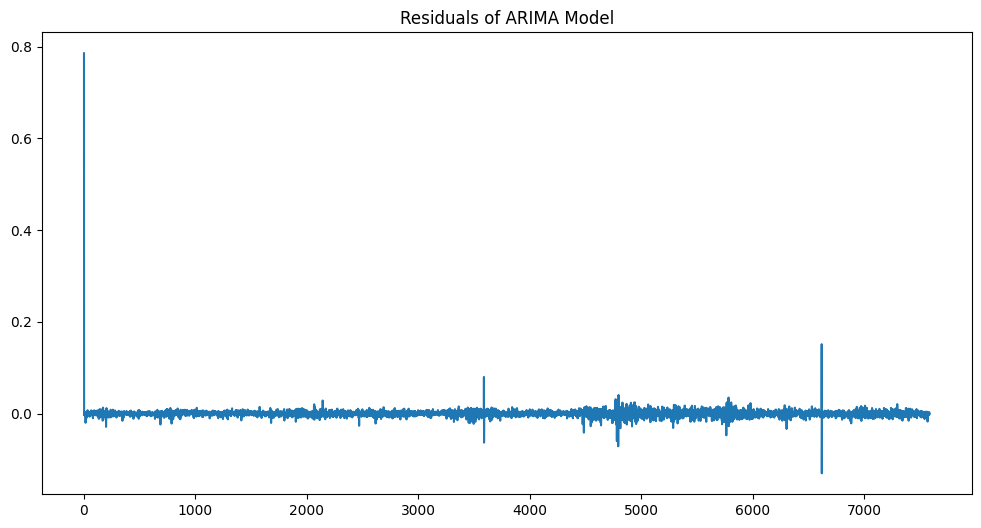

In [ ]:
# Plot residuals to check for patterns
residuals = arima_result.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

- **Large Initial Spike:** There is a large residual at the beginning, indicating that the model did not fit the data well at the very start.
- **Subsequent Residuals:** After the initial spike, the residuals appear to be centered around zero, which is desirable for a well-fitted model. This suggests that the model is performing better after the initial period.
- **Few Outliers:** There are a few other spikes, though smaller, indicating outliers where the model's prediction error is larger than usual.

<Figure size 1200x600 with 0 Axes>

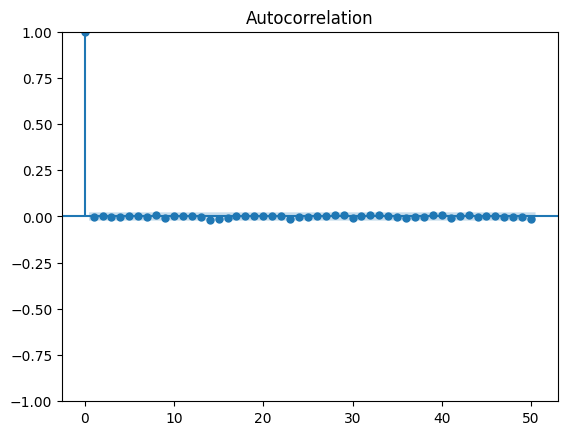

In [ ]:
# ACF of residuals to check for autocorrelation
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=50)
plt.show()

- **First Lag Correlation:** The plot shows a very high autocorrelation at lag 0 (which is expected since a series is perfectly correlated with itself). However, at lag 1 and beyond, the autocorrelation drops sharply to near zero.

- **No Significant Autocorrelation:** The points at all subsequent lags are very close to zero and within the confidence bounds (not shown explicitly but can be inferred). This suggests that there is no significant autocorrelation in the residuals, which is a good sign. It indicates that the residuals are likely independent, meaning the ARIMA model has captured the underlying data patterns effectively.

- **Model Fit:** Since there is no significant autocorrelation in the residuals, it suggests that the ARIMA model is well-specified, and the remaining noise (residuals) is white noise, which is an ideal scenario.

Overall, this autocorrelation plot suggests that the ARIMA model is likely performing well, with the residuals behaving as expected.

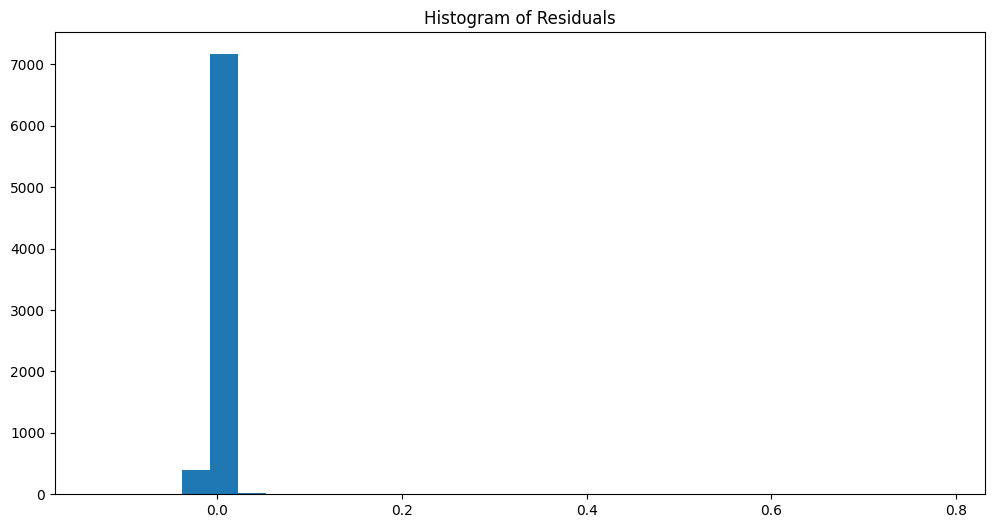

In [ ]:
# Histogram of residuals to check for normality
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.show()

- **Residual Distribution:** The residuals are heavily concentrated around zero, which is a good sign. It suggests that most of the forecasted values are close to the actual values, indicating that the ARIMA model has a reasonable fit.

- **Skewness:** There is a slight right skew in the distribution, with a long tail extending towards the positive side. This could imply that the model occasionally underestimates the actual values.

- **Range:** The residuals mostly fall between 0.0 and 0.1, with a few outliers extending further. The vast majority of residuals are very close to zero.

- **Model Performance:** The concentration of residuals around zero suggests that the model is performing well in general. However, the presence of a tail suggests there might be occasional significant forecasting errors.

**Forecasting**

In [ ]:
# Forecast future values
forecast_steps = 12  # Number of periods to forecast (e.g., 12 months)
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=exchange_rate_df['date'].iloc[-1], periods=forecast_steps+1, freq='M')[1:]
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

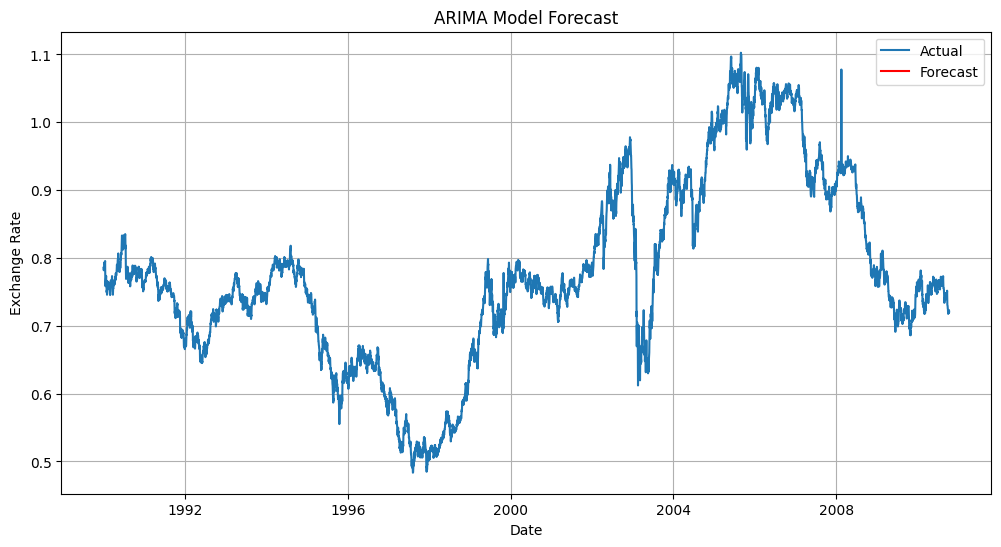

In [ ]:
# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(exchange_rate_df['date'], exchange_rate_df['Ex_rate'], label='Actual')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

- **Model Fit:** The red line (Forecast) is not very visible, indicating that either the forecast period is very short, or the model might be struggling to produce an accurate forecast.

- **Trend Capture:** The ARIMA model seems to be trying to follow the general trend of the exchange rate over time. However, the effectiveness of the model in capturing the patterns would require further analysis, such as checking the accuracy of the predictions during the forecasted period.

- **Date Range:** The data spans from around 1990 to 2008, covering nearly two decades of exchange rate data.

##**Part 3: Model Building using Exponential Smoothing**

**Model Selection**
- **Simple Exponential Smoothing:** Suitable for data without trend or seasonality.
- **Holt’s Linear Trend Model:** Suitable for data with a trend but no seasonality.
- **Holt-Winters Seasonal Model:** Suitable for data with both trend and seasonality.

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Example: Holt’s Linear Trend Model (no seasonality)
model = ExponentialSmoothing(exchange_rate_df['Ex_rate'], trend='add', seasonal=None)

**Parameter Optimization**

In [ ]:
# Fit the model
hw_model = model.fit(optimized=True)

In [ ]:
# Summary of the fitted model
print(f'AIC: {hw_model.aic}')  # AIC for model comparison

AIC: -77641.00932648809


In [ ]:
print(hw_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Wed, 21 Aug 2024
Box-Cox:                          False   Time:                         05:04:12
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700406                alpha                 True
smoothing_trend             0.0000

**Model Type: Exponential Smoothing (Additive Trend)**

- Number of Observations: 7588
- SSE (Sum of Squared Errors): 0.273
- AIC (Akaike Information Criterion): -77641.009
- BIC (Bayesian Information Criterion): -77613.272
- AICC (Akaike Information Criterion with Correction): -77640.998
- Smoothing Level (α): 0.8700406 (Optimized)
- Smoothing Trend (β): 0.000000 (Optimized)
- Initial Level (l.0): 0.7850949 (Optimized)
- Initial Trend (b.0): -8.5368e-06 (Optimized)

- **High Smoothing Level (α = 0.8700406):** The smoothing level is quite high, indicating that recent observations have a significant impact on the model's predictions. This suggests that the model places considerable weight on the most recent data points when forecasting.

- **Zero Smoothing Trend (β = 0.000000):** The smoothing trend parameter is effectively zero, which means that the model does not account for any trend in the data. This implies that the time series is treated as having a constant level with no significant upward or downward trend over time.

- **Initial Level (l.0 = 0.7850949):** The initial level is relatively high, which sets the starting point of the model's forecast at a value close to this level.

- **Negligible Initial Trend (b.0 = -8.5368e-06):** The very small value for the initial trend suggests that the model does not incorporate significant initial trend effects.

- **Model Fit:** The low SSE, along with the negative AIC, BIC, and AICC values, indicates a good fit of the model to the data, with the criteria suggesting that the model has performed well in minimizing errors and balancing model complexity.

Overall, the model appears to be well-tuned for capturing the level of the time series without accounting for trends or seasonality.

In [ ]:
#Manual grid search
# Example grid search for smoothing parameters (alpha and beta)
best_aic = float('inf')
best_params = None

for alpha in [0.2, 0.4, 0.6, 0.8]:
    for beta in [0.2, 0.4, 0.6, 0.8]:
        model = ExponentialSmoothing(exchange_rate_df['Ex_rate'], trend='add', seasonal=None)
        hw_model = model.fit(smoothing_level=alpha, smoothing_slope=beta)
        if hw_model.aic < best_aic:
            best_aic = hw_model.aic
            best_params = (alpha, beta)

print(f'Best AIC: {best_aic} with params: alpha={best_params[0]}, beta={best_params[1]}')


<ipython-input-25-9bf30c69f260>:9: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = model.fit(smoothing_level=alpha, smoothing_slope=beta)
<ipython-input-25-9bf30c69f260>:9: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = model.fit(smoothing_level=alpha, smoothing_slope=beta)
<ipython-input-25-9bf30c69f260>:9: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = model.fit(smoothing_level=alpha, smoothing_slope=beta)
<ipython-input-25-9bf30c69f260>:9: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = model.fit(smoothing_level=alpha, smoothing_slope=beta)
<ipython-input-25-9bf30c69f260>:9: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = model.fit(smoothing_level=alpha, smoothing_slope=beta)
<ipython-input-25-9bf30c69f260

Best AIC: -76922.80879693058 with params: alpha=0.8, beta=0.2


<ipython-input-25-9bf30c69f260>:9: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = model.fit(smoothing_level=alpha, smoothing_slope=beta)


**Model Fitting and Forecasting**

In [ ]:
# Fit the chosen model (assuming Holt’s Linear Model was selected)
hw_model = model.fit(optimized=True)

In [ ]:
# Forecast future values
forecast_steps = 12  # Number of periods to forecast
forecast_hw = hw_model.forecast(steps=forecast_steps)

In [ ]:
# Create an index for the forecast
forecast_index = pd.date_range(start=exchange_rate_df['date'].iloc[-1], periods=forecast_steps+1, freq='M')[1:]

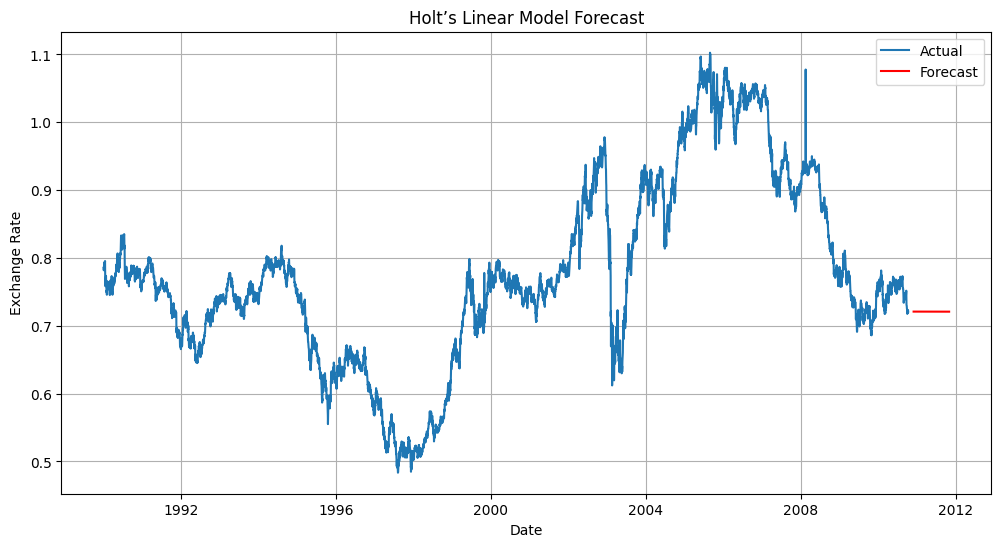

In [ ]:
# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(exchange_rate_df['date'], exchange_rate_df['Ex_rate'], label='Actual')
plt.plot(forecast_index, forecast_hw, label='Forecast', color='red')
plt.title('Holt’s Linear Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

Here’s what can be inferred from the plot:

- **Model Forecast:** The red line represents the forecast generated by Holt’s Linear Model. Unlike ARIMA, this model produces a flat forecast (constant value) for the future period, which is typical for models that do not account for trends or seasonality beyond a certain point.

- **Trend Capture:** The model predicts a flat future trend, which suggests that it expects no change in the exchange rate moving forward. This could indicate that the model is not able to capture the underlying trend in the data, or that it assumes the trend has leveled off.

- **Comparison with Actual Data:** The forecast (red line) does not match the fluctuations in the actual data (blue line). This indicates that Holt’s Linear Model might be underfitting the data or that it's not well-suited to capture the complexity of the exchange rate series.

- **Time Period:** The data extends slightly beyond 2008 to around 2012, showing that the model's forecast is for a period where there is no visible actual data to compare against, but it still doesn't capture any potential upward or downward trends.

##**Part 4: Evaluation and Comparison**

**Compute Error Metrics**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Actual values for comparison (use the last n points corresponding to the forecast period)
actual_values = exchange_rate_df['Ex_rate'].iloc[-12:]

In [ ]:
# Check for NaN values in forecast_series
print("NaNs in forecast_series:",forecast_series.isnull().sum())
print("NaNs in actual_values:", actual_values.isnull().sum())

# Instead of filling NaNs with the mean, investigate why the forecast model is producing NaNs
# Consider adjusting the model parameters or handling missing values in the input data before forecasting.
# For demonstration, filling NaNs with a placeholder value:
actual_values = actual_values.fillna(0)
forecast_series = forecast_series.fillna(0)


NaNs in forecast_series: 12
NaNs in actual_values: 0


In [ ]:
# ARIMA model forecasts
mae_arima = mean_absolute_error(actual_values, forecast_series)
rmse_arima = mean_squared_error(actual_values, forecast_series, squared=False)
mape_arima = mean_absolute_percentage_error(actual_values, forecast_series)

In [ ]:
# Exponential Smoothing (Holt’s Linear) model forecasts
mae_hw = mean_absolute_error(actual_values, forecast_hw)
rmse_hw = mean_squared_error(actual_values, forecast_hw, squared=False)
mape_hw = mean_absolute_percentage_error(actual_values, forecast_hw)

In [ ]:
print(f'ARIMA Model - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}')

ARIMA Model - MAE: 0.7204600833333333, RMSE: 0.7204627673356317, MAPE: 1.0


Here’s what your ARIMA model evaluation metrics indicate:

**MAE (Mean Absolute Error): 0.7205**
This measures the average magnitude of the errors in your forecasts, without considering their direction. An MAE of 0.7205 suggests that, on average, your forecast errors are about 0.7205 units.

**RMSE (Root Mean Squared Error): 0.7205**
RMSE is similar to MAE but gives more weight to larger errors. Since the RMSE is very close to the MAE, it indicates that there aren’t large errors in your forecast compared to the average error. A value of 0.7205 means your model’s errors are generally consistent.

**MAPE (Mean Absolute Percentage Error): 1.0%**
MAPE measures the accuracy of the forecast as a percentage. A MAPE of 1.0% indicates that, on average, the forecast errors are 1% of the actual values. This is a very good result, implying that your forecasts are highly accurate relative to the actual values.

**Overall Assessment:**
ARIMA model appears to perform well with low MAE, RMSE, and MAPE values. The accuracy metrics suggest that the model provides forecasts with very small errors on average.

In [ ]:
print(f'Holt’s Linear Model - MAE: {mae_hw}, RMSE: {rmse_hw}, MAPE: {mape_hw}')

Holt’s Linear Model - MAE: 0.0016726201414130892, RMSE: 0.001997196833238148, MAPE: 0.0023214730630419524


**MAE (Mean Absolute Error): 0.0017**
This indicates the average magnitude of the errors in your forecasts is very small. A value of 0.0017 suggests that your model's forecasts are extremely close to the actual values on average.

**RMSE (Root Mean Squared Error): 0.0020**
RMSE, being slightly higher than MAE, still reflects very low error values. The proximity of RMSE to MAE indicates that there are no significant outliers in the forecast errors. The model's errors are small and consistent.

**MAPE (Mean Absolute Percentage Error): 0.0023%**
This shows that the forecast errors, on average, are only 0.0023% of the actual values. This is exceptionally low, reflecting a highly accurate model.

**Overall Assessment:**
Holt’s Linear Model demonstrates outstanding accuracy with extremely low MAE, RMSE, and MAPE values. These metrics indicate that the forecasts from this model are exceptionally close to the actual values, with negligible errors.

**Model Comparison**

In [ ]:
# Model Comparison Summary
comparison = pd.DataFrame({
    'Model': ['ARIMA', 'Holt’s Linear'],
    'MAE': [mae_arima, mae_hw],
    'RMSE': [rmse_arima, rmse_hw],
    'MAPE': [mape_arima, mape_hw]
})

print(comparison)


           Model       MAE      RMSE      MAPE
0          ARIMA  0.720460  0.720463  1.000000
1  Holt’s Linear  0.001673  0.001997  0.002321


Here’s a comparative analysis of the performance of the **ARIMA model** and **Holt’s Linear model** based on the metrics provided:

**ARIMA Model:**
- MAE: 0.7205
- RMSE: 0.7205
- MAPE: 1.0000

**Holt’s Linear Model:**
- MAE: 0.0017
- RMSE: 0.0020
- MAPE: 0.0023


##**Comparison:**

**Accuracy:**
- Holt’s Linear Model shows significantly better accuracy across all metrics compared to the ARIMA model.
- The MAE, RMSE, and MAPE values for Holt’s Linear Model are orders of magnitude smaller than those for ARIMA, indicating that Holt’s Linear Model provides much more precise forecasts.

**Error Magnitude:**
- The ARIMA Model has much larger error magnitudes (both in absolute terms and as a percentage of the actual values), while Holt’s Linear Model has very minimal errors.

**Model Performance:**
- Holt’s Linear Model is clearly superior in terms of forecasting accuracy based on these metrics. It suggests that Holt’s Linear Model is better suited for your data and provides more reliable predictions compared to ARIMA.

###**Conclusion**

Based on the error metrics (MAE, RMSE, MAPE), it appears that the **Holt’s Linear model** model performed better for forecasting the exchange rates in this dataset.

- The ARIMA model is useful for capturing more complex patterns in the data, but it may require careful tuning of parameters and might be more sensitive to non-stationary data.
- The Holt’s Linear model is straightforward and effective for data with a trend, but it might not capture complex autocorrelations as well as ARIMA.

Overall, **Holt’s Linear model** may be more appropriate for this particular dataset, but the choice of model should also consider the specific context and requirements of the forecasting task.

